# Import packages

In [1]:
%load_ext autoreload
%autoreload 2
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
import matplotlib as mpl
import networkx as nx
import numpy as np
import pandas as pd
import pickle
import os
import re
import itertools as itr
from enm.Enm import Enm
from enm.utils import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Read Enm pickle object

In [3]:
nw_type = 'coessentiality'

In [62]:
#os.chdir('../')
figure_folder = f"../reports/figures/paper_figures_{nw_type}"

In [67]:
if os.path.exists(figure_folder) == False:
    os.mkdir(figure_folder)

In [4]:
with open(f'../data/interim/{nw_type}/{nw_type}_enm_object_human.pickle','rb') as f:
    e_pcc = pickle.load(f)



# Calculate node positions with spring layout

**This could be different from the ones shown in paper due to random node position calculation**

This does not change any claims in the paper

In [5]:
#e_pcc.spring_pos(seed=12)

In [6]:
pos =e_pcc.graph_gc.nodes('pos')

# Network plot
## Figure 1B, left

(-4.185572183132171, 4.389788901805877, -4.214904761314392, 4.322957015037536)

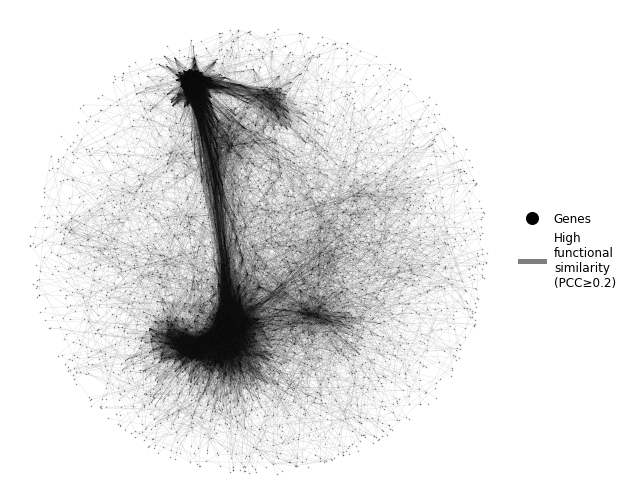

In [7]:
fig, ax =plt.subplots(figsize=(9,9))

nx.draw_networkx_nodes(e_pcc.graph_gc,
                           node_size=0.2,
                           alpha=0.5,
                           node_color='k',
                           pos=pos,
                         ax=ax
                           # node_shape=matplotlib.markers.MarkerStyle(marker='o',fillstyle='full')
                           )
nx.draw_networkx_edges(e_pcc.graph_gc,
                           alpha= 0.5,
                           width= 0.1,
                           edge_color='k',
                           pos=pos,
                           label='PCC>0.2',ax=ax)
legend_elements = [Line2D([0], [0], marker='o', color='black', label='Genes',
                              markerfacecolor='black', markersize=12, linestyle="None"),
                       Line2D([0], [0], marker='o', color='black', label= 'High\nfunctional\nsimilarity\n(PCC≥0.2)',
                              markerfacecolor='black', markersize=0, linestyle="-", alpha=0.5,lw=5)
    ]

lgd = ax.legend(handles=legend_elements, fontsize=12,loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)

ax.axis('off')
# if snakemake.params['save']:
#     plt.savefig(f'{figure_folder}/fig1b_left.png',bbox_inches='tight',dpi=150)

# Figure 6A

In [19]:
import seaborn as sns
sensor_colors = [mpl.colors.to_hex(i) for i in sns.color_palette('Set3')]

In [20]:
change_go_group_names = False#snakemake.params['change_go_group_name']
# sensor_go_rename = {
#   "cellular response to iron ion starvation":'Iron ion transport' ,
# "mitochondria-nucleus signaling pathway":  "Mitochondria-nucleus\nsignaling pathway\nand\nTricarboxylic acid cycle",
# "phenylalanine transport":  "Phenylalanine transport",
# "hexose metabolic process":  "Hexose metabolic process",
# "tricarboxylic acid cycle":  "Tricarboxylic acid cycle"
# }

In [22]:
sensors_pcc = pd.read_csv(f'../data/interim/{nw_type}/{nw_type}_sensors_df_human.csv')
# sensor_colors = ["#377EB8", "#4DAF4A", "#984EA3", "#FF7F00", "#FFFF33"]
# if change_go_group_names:
#    sensors_pcc['go_group']=sensors_pcc['go_group'].map(sensor_go_rename,na_action='ignore')
sensor_order = sensors_pcc.groupby('label').sens.median().sort_values().index.tolist()

In [106]:
sensor_order = ['SC1\nhistone deacetylation',
    'Unclustered',
 'SC2',
 'SC3\nI-kappaB kinase/NF-kappaB signaling']

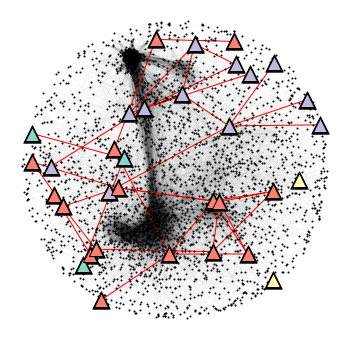

In [107]:
fig, ax = plt.subplots(figsize=(6,6))
#axs = ax.ravel()
legend_elements = [    ]

#for i in range(len(sensor_order)):
e_pcc.plot_network_spring(ax=ax,
                          node_size=1,
                          node_color='black',
 #                        node_size = [100 if i in sensors_pcc.orf_name.values or i in effector_pcc.orf_name.values else 1 for i in e_pcc.nodes],
                         #node_color = ['red' if i in sensors_pcc.orf_name.values else 'blue' if i in effector_pcc.orf_name.values else 'black' for i in e_pcc.nodes],
                         edge_color='black',savefig=False)
    #                         node_shape=['^' if i in sensors_pcc.orf_name.values else 'v' if i in effector_pcc.orf_name.values else 'o' for i in e_pcc.nodes])
    # nx.draw_networkx_nodes(e_pcc.graph_gc, nodelist=sensors_pcc.orf_name.values, node_size=200, pos=pos,
    #                           node_color='black',
    #                           node_shape='^',edgecolors='black',
    #                           linewidths=1)
nx.draw_networkx_nodes(nx.induced_subgraph(e_pcc.graph_gc, sensors_pcc.orf_name.tolist()),
                       pos=pos, 
                       node_color='black', alpha=1, node_shape='^')

for itr, i in enumerate(sensor_order):
   # print(i, sensor_order[itr])

    orf_names_to_plot = sensors_pcc.loc[sensors_pcc.label==i, 'orf_name'].tolist()
    nx.draw_networkx_nodes(e_pcc.graph_gc, nodelist=orf_names_to_plot, node_size=200, pos=pos,
                          node_color=sensor_colors[itr],
                          node_shape='^',edgecolors='black',
                          linewidths=1)
    legend_elements.append(
        Line2D([0], [0], marker='^', color='black', label=f'{i}',
                              markerfacecolor=sensor_colors[itr], markersize=8, linestyle="None")
    )
    if itr >10:
        break
ax.set_facecolor('white')
#legend_elements.append(
#        Line2D([0], [0], marker='^', color='black', label=f'No GO Enrichment',
#                              markerfacecolor='black', markersize=8, linestyle="None")
#    )
legend_elements.extend(
    [Line2D([0], [0], marker='o', color='black', label='Other Genes',
                              markerfacecolor='black', markersize=4, linestyle="None"),
#                    Line2D([0], [0], marker='o', color='black', label='Effectors',
#                               markerfacecolor='black', markersize=10, linestyle="None"),
#                    Line2D([0], [0], marker='^', color='black', label='Sensors',
#                               markerfacecolor='black', markersize=10, linestyle="None"),
                       Line2D([0], [0], marker='o', color='black', label= 'High functional similarity',
                              markerfacecolor='black', markersize=0, linestyle="-", alpha=0.5, lw=4),
                   Line2D([0], [0], marker='o', color='red', label= 'Sensor-Sensor edges',
                              markerfacecolor='#018571', markersize=0, linestyle="-",lw=4)
                   #Line2D([0], [0], marker='o', color='blue', label= 'Effector-Effector edges',
    #                          markerfacecolor='#a6611a', markersize=0, linestyle="-")
    ]
)
#lgd = ax.legend(handles=legend_elements, fontsize=22,loc='center left', bbox_to_anchor=(1.1, 0.5),ncol=5)
nx.draw_networkx_edges(nx.induced_subgraph(e_pcc.graph_gc, sensors_pcc.orf_name.tolist()),pos=pos, edge_color='red', alpha=1)
ax.axis('off')
# if snakemake.params['save']:
plt.savefig(f'{figure_folder}/fig3c.png',bbox_inches='tight',dpi=150,facecolor='white')

In [25]:
sc = nx.induced_subgraph(e_pcc.graph_gc, sensors_pcc.orf_name.tolist())

In [60]:
sensors_pcc[['go_group','label']].drop_duplicates()#.dropna(subset=['go_group']).go_group.value_counts()

,go_group,label
0,I-kappaB kinase/NF-kappaB signaling,SC3\nI-kappaB kinase/NF-kappaB signaling
5,histone deacetylation,SC1\nhistone deacetylation
13,NaN,SC2
15,NaN,Unclustered


In [61]:
sensors_pcc.groupby('label').size()

label
SC1\nhistone deacetylation                   3
SC2                                         12
SC3\nI-kappaB kinase/NF-kappaB signaling    16
Unclustered                                  2
dtype: int64

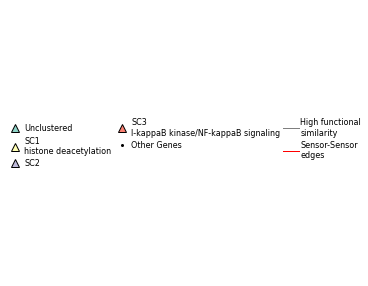

<Figure size 216x72 with 0 Axes>

In [102]:
smsize = 2
lgsize = 8
linesize = 1 
legend_elements = []
for itr, i in enumerate(sensor_order):
   # print(i, sensor_order[itr])

    #orf_names_to_plot = sensors_pcc.loc[sensors_pcc.label==i, 'orf_name'].tolist()
#     nx.draw_networkx_nodes(e_pcc.graph_gc, nodelist=orf_names_to_plot, node_size=200, pos=pos,
#                           node_color=sensor_colors[itr],
#                           node_shape='^',edgecolors='black',
#                           linewidths=1)
    legend_elements.append(
        Line2D([0], [0], marker='^', color='black', label=f'{i}',
                              markerfacecolor=sensor_colors[itr], markersize=lgsize, linestyle="None")
    )
#ax.set_facecolor('white')
legend_elements.extend(
    [Line2D([0], [0], marker='o', color='black', label='Other Genes',
                              markerfacecolor='black', markersize=smsize, linestyle="None"),
#                    Line2D([0], [0], marker='o', color='black', label='Effectors',
#                               markerfacecolor='black', markersize=10, linestyle="None"),
#                    Line2D([0], [0], marker='^', color='black', label='Sensors',
#                               markerfacecolor='black', markersize=10, linestyle="None"),
                       Line2D([0], [0], marker='o', color='black', label= 'High functional\nsimilarity',
                              markerfacecolor='black', markersize=0, linestyle="-", alpha=0.5, lw=linesize),
                   Line2D([0], [0], marker='o', color='red', label= 'Sensor-Sensor\nedges',
                              markerfacecolor='#018571', markersize=0, linestyle="-",lw=linesize)
                   #Line2D([0], [0], marker='o', color='blue', label= 'Effector-Effector edges',
    #                          markerfacecolor='#a6611a', markersize=0, linestyle="-")
    ]
)
fig = plt.figure()
figlegend = plt.figure(figsize=(3,1))
ax = fig.add_subplot(111)
#lines = ax.plot(range(10), plt.randn(10), range(10), plt.randn(10))
ax.axis('off')
lgd = ax.legend(handles=legend_elements,
                handletextpad=0.1, 
                labelspacing=0.4, 
                borderpad=0,
                columnspacing=0.4,
                fontsize=8, 
                ncol=3,
                frameon=False, 
                loc = 'center',
                bbox_to_anchor=(0., 0., 1, 1))
# if snakemake.params['save']:
fig.savefig(f'{figure_folder}/fig3c_legend.pdf', dpi=150, pad_inches=0,facecolor='white', bbox_inches='tight')

In [154]:
sensors_pcc[['label','gid']].drop_duplicates()

,label,gid
0,SC3\nI-kappaB kinase/NF-kappaB signaling,3
5,SC1\nhistone deacetylation,1
13,SC2,2
15,Unclustered,0


# Figure 6C

In [74]:
effector_pcc = pd.read_csv(f'../data/interim/{nw_type}/{nw_type}_effectors_df_human.csv')

In [76]:
effectors_df = effector_pcc

In [77]:
effectors_df['effector_cluster'] = effectors_df.fillna(value={'effector_cluster':'Unclustered'}).effector_cluster.astype("category")
effectors_df['gid'] = effectors_df.groupby('effector_cluster').ngroup()
effectors_df['cluster_or_go'] = ['Unclustered' if effectors_df.at[i,'effector_cluster'] == 'Unclustered' 
                            else effectors_df.at[i,'gid'] if pd.isna(effectors_df.at[i,'go_group']) 
                            else effectors_df.at[i,'go_group'] for i in range(effectors_df.shape[0])]
effectors_df['label'] = ["Unclustered" if effectors_df.at[i,'cluster_or_go']=='Unclustered' 
                                    else f"EC{effectors_df.at[i,'gid']}" if type(effectors_df.at[i,'cluster_or_go'])==np.int64
                                    else f"EC{effectors_df.at[i,'gid']}\n{effectors_df.at[i,'cluster_or_go']}" for i in range(effectors_df.shape[0])]

In [80]:
#effector_colors = ["#A65628", "#F781BF", "#999999"]
effector_order_orig = effectors_df.groupby('label').eff.median().sort_values().index.tolist()
effector_colors = ["#A65628", "#F781BF", "#999999",'blue','yellow','red']

In [81]:
#effector_pcc['effector_cluster'] = effector_pcc['effector_cluster'].fillna('Unclustered')

In [82]:
if False:
    effector_go_group_map = {
        effector_order_orig[0]:"EC1 (Chromosome segregation)",
        effector_order_orig[1]:"EC2 (Golgi vesicle transport)",
        effector_order_orig[2]:"EC3 (Respiratory complex assembly)"
    }
    effector_pcc['label'] = effector_pcc['label'].map(effector_go_group_map)
effector_order = effector_pcc.groupby('label').eff.median().sort_values().index.tolist()

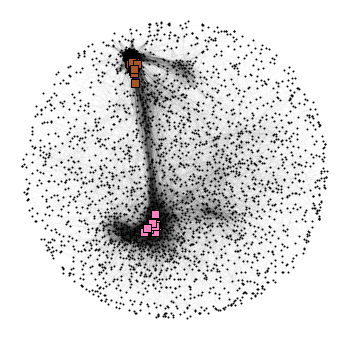

In [109]:
fig, ax = plt.subplots(figsize=(6,6))
#axs = ax.ravel()
legend_elements = [    ]

#for i in range(len(sensor_order)):
e_pcc.plot_network_spring(ax=ax,
                          node_size=1,
                          node_color='black',
 #                        node_size = [100 if i in sensors_pcc.orf_name.values or i in effector_pcc.orf_name.values else 1 for i in e_pcc.nodes],
                         #node_color = ['red' if i in sensors_pcc.orf_name.values else 'blue' if i in effector_pcc.orf_name.values else 'black' for i in e_pcc.nodes],
                         edge_color='black',savefig=False)
    #                         node_shape=['^' if i in sensors_pcc.orf_name.values else 'v' if i in effector_pcc.orf_name.values else 'o' for i in e_pcc.nodes])
    # nx.draw_networkx_nodes(e_pcc.graph_gc, nodelist=sensors_pcc.orf_name.values, node_size=200, pos=pos,
    #                           node_color='black',
    #                           node_shape='^',edgecolors='black',
    #                           linewidths=1)

for itr, i in enumerate(effector_order):
   # print(i, effector_colors[itr])
    #print(itr)
    
    orf_names_to_plot = effector_pcc.loc[effector_pcc.label==i, 'orf_name'].tolist()
    nx.draw_networkx_nodes(e_pcc.graph_gc, nodelist=orf_names_to_plot, node_size=50, pos=pos,
                          node_color=effector_colors[itr],
                          node_shape='s',edgecolors='black',
                          linewidths=1)
    legend_elements.append(
        Line2D([0], [0], marker='s', color='black', label=f'{i}',
                              markerfacecolor=effector_colors[itr], markersize=20, linestyle="None")
    )
ax.set_facecolor('white')
legend_elements.extend(
    [Line2D([0], [0], marker='o', color='black', label='Other Genes',
                              markerfacecolor='black', markersize=10, linestyle="None"),
#                    Line2D([0], [0], marker='o', color='black', label='Effectors',
#                               markerfacecolor='black', markersize=10, linestyle="None"),
#                    Line2D([0], [0], marker='^', color='black', label='Sensors',
#                               markerfacecolor='black', markersize=10, linestyle="None"),
                       Line2D([0], [0], marker='o', color='black', label= 'High functional similarity',
                              markerfacecolor='black', markersize=0, linestyle="-", alpha=0.5,lw=10),
                   Line2D([0], [0], marker='o', color='blue', label= 'Effector-Effector edges',
                             markerfacecolor='#a6611a', markersize=0, linestyle="-",lw=10)
    ]
)
#lgd = ax.legend(handles=legend_elements, fontsize=22,loc='center', bbox_to_anchor=(0.5, -0.1), frameon=False, ncol=2)


nx.draw_networkx_edges(nx.induced_subgraph(e_pcc.graph_gc, effector_pcc.orf_name.tolist()), ax=ax , pos=pos, edge_color='blue',alpha=0.5)
ax.axis('off')
# if snakemake.params['save']:
plt.savefig(f'{figure_folder}/fig4b.png',bbox_inches='tight',dpi=150,facecolor='white')

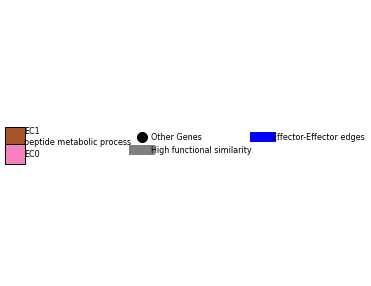

<Figure size 216x72 with 0 Axes>

In [101]:
smsize = 2
lgsize = 8
linesize = 1 
#legend_elements = []
# for itr, i in enumerate(sensor_order):
#    # print(i, sensor_order[itr])

#     #orf_names_to_plot = sensors_pcc.loc[sensors_pcc.label==i, 'orf_name'].tolist()
# #     nx.draw_networkx_nodes(e_pcc.graph_gc, nodelist=orf_names_to_plot, node_size=200, pos=pos,
# #                           node_color=sensor_colors[itr],
# #                           node_shape='^',edgecolors='black',
# #                           linewidths=1)
#     legend_elements.append(
#         Line2D([0], [0], marker='^', color='black', label=f'{i}',
#                               markerfacecolor=sensor_colors[itr], markersize=lgsize, linestyle="None")
#     )
# #ax.set_facecolor('white')
# legend_elements.extend(
#     [Line2D([0], [0], marker='o', color='black', label='Other Genes',
#                               markerfacecolor='black', markersize=smsize, linestyle="None"),
# #                    Line2D([0], [0], marker='o', color='black', label='Effectors',
# #                               markerfacecolor='black', markersize=10, linestyle="None"),
# #                    Line2D([0], [0], marker='^', color='black', label='Sensors',
# #                               markerfacecolor='black', markersize=10, linestyle="None"),
#                        Line2D([0], [0], marker='o', color='black', label= 'High functional\nsimilarity',
#                               markerfacecolor='black', markersize=0, linestyle="-", alpha=0.5, lw=linesize),
#                    Line2D([0], [0], marker='o', color='red', label= 'Sensor-Sensor\nedges',
#                               markerfacecolor='#018571', markersize=0, linestyle="-",lw=linesize)
#                    #Line2D([0], [0], marker='o', color='blue', label= 'Effector-Effector edges',
#     #                          markerfacecolor='#a6611a', markersize=0, linestyle="-")
#     ]
# )
fig = plt.figure()
figlegend = plt.figure(figsize=(3,1))
ax = fig.add_subplot(111)
#lines = ax.plot(range(10), plt.randn(10), range(10), plt.randn(10))
ax.axis('off')
lgd = ax.legend(handles=legend_elements,
                handletextpad=0.1, 
                labelspacing=0.4, 
                borderpad=0,
                columnspacing=0.4,
                fontsize=8, 
                ncol=3,
                frameon=False, 
                loc = 'center',
                bbox_to_anchor=(0., 0., 1, 1))
# if snakemake.params['save']:
fig.savefig(f'{figure_folder}/fig4b_legend.pdf', dpi=150, pad_inches=0,facecolor='white', bbox_inches='tight')